# Homework: Food Preferences Clustering

In this homework assignment, you will apply a clustering technique (specifically the KMeans algorithm) to a simulated dataset that shows respondents' preferences for different food categories. The goal is to identify natural groups of respondents with similar eating habits.

## 1. Data preparation and loading

First, prepare the dataset. A synthetic dataset `food_preferences.csv` will be used.

**Task:** Import the required libraries and load `food_preferences.csv` into a Pandas DataFrame. Display the first few rows and basic information about the data.

In [ ]:
""" - required libraries
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install seaborn
!pip install matplotlib
"""

In [50]:
# TODO: Import required libraries (pandas, numpy, matplotlib.pyplot, seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# TODO: Load the CSV file into a DataFrame
data = pd.read_csv('../datasets/food_preferences.csv')

# TODO: Display the first 5 rows of the DataFrame
print(data.head())

# TODO: Display DataFrame info
print(data.info())

   Fruits_Vegetables  Meat_Fish  Dairy_Products  Grains_Pastries  \
0                 16          5              14               12   
1                 13          9              13               14   
2                 17          7              13               16   
3                 14          2               5               18   
4                 16          4              13               17   

   Sweets_Snacks  ID  
0              7   1  
1              3   2  
2              5   3  
3              4   4  
4              5   5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Fruits_Vegetables  100 non-null    int64
 1   Meat_Fish          100 non-null    int64
 2   Dairy_Products     100 non-null    int64
 3   Grains_Pastries    100 non-null    int64
 4   Sweets_Snacks      100 non-null    int64
 5   ID                 100 

## 2. Prepare data for clustering

Before applying KMeans, prepare the data. The `ID` column is only an identifier for respondents and should not be used in clustering, since it does not describe preferences.

**Task:** Create a new DataFrame that does not contain the `ID` column. This will be `X` (the feature matrix) used for KMeans.

In [59]:
# TODO: Create a new DataFrame 'X_clustering' without the 'ID' column
X_clustering = data.drop(columns=['ID'])

# TODO: Display the first 5 rows of the new DataFrame to confirm the ID column is absent
print(X_clustering.head())

   Fruits_Vegetables  Meat_Fish  Dairy_Products  Grains_Pastries  \
0                 16          5              14               12   
1                 13          9              13               14   
2                 17          7              13               16   
3                 14          2               5               18   
4                 16          4              13               17   

   Sweets_Snacks  
0              7  
1              3  
2              5  
3              4  
4              5  


## 3. Apply KMeans clustering

Now apply the KMeans algorithm. Experiment with different numbers of clusters (K) to see how grouping changes.

**Task:**
1. Import `KMeans` from `sklearn.cluster`.
2. For each `K` in `{2, 3, 4, 5}`:
    * Initialize a KMeans model with `n_clusters=K`.
    * Use `init='k-means++'`, `n_init=10`, `max_iter=300`, `random_state=42` for stable results.
    * Apply the model to `X_clustering` using the `fit_predict()` method. Save results to variables (e.g. `clusters_k2`, `clusters_k3`, ...).
    * Show the **size of each cluster** (how many respondents belong to each cluster) with `pd.Series(cluster_result).value_counts()`.
    * Show the **cluster centroids** (`kmeans_model.cluster_centers_`). These are the average values for each food category within each cluster. Format centroids as a DataFrame for readability.
    * **Interpret** what centroids reveal about characteristics of each group for that K. Try to give a descriptive name to each cluster (e.g., "meat lovers", "fruit lovers").

In [72]:
# TODO: Implement KMeans experiments for K in {2,3,4,5}
from sklearn.cluster import KMeans
values = [2, 3, 4, 5]
clusters = {}
for k in values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=300)
    clusters[f"clusters_k{k}"] = kmeans_model.fit_predict(X_clustering)
    print(f"\nSize of cluster for k={k}: \n", pd.Series(clusters[f"clusters_k{k}"]).value_counts().sort_index())
    
    df_centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=X_clustering.columns)
    print(f"\nCentroids for k={k}: \n", df_centroids)
    
    for i in df_centroids.index:
        if df_centroids.loc[i].idxmax() == "Fruits_Vegetables":
            print(f"\nCluster {i} represents fruit and vegetables lovers.")
        elif df_centroids.loc[i].idxmax() == "Meat_Fish":
            print(f"\nCluster {i} represents meat and fish lovers.")
        elif df_centroids.loc[i].idxmax() == "Sweets_Snacks":
            print(f"\nCluster {i} represents sweets and snacks lovers.")
        elif df_centroids.loc[i].idxmax() == "Dairy_Products":
            print(f"\nCluster {i} represents dairy lovers.")
        elif df_centroids.loc[i].idxmax() == "Grains_Pastries":
            print(f"\nCluster {i} represents grains and pastries lovers.")
        
    print("\n" + "-"*50)



Size of cluster for k=2: 
 0    44
1    56
Name: count, dtype: int64

Centroids for k=2: 
    Fruits_Vegetables  Meat_Fish  Dairy_Products  Grains_Pastries  \
0           4.750000  15.295455       12.522727         4.704545   
1          13.089286   6.553571       12.000000        13.750000   

   Sweets_Snacks  
0      14.045455  
1       5.375000  

Cluster 0 represents meat and fish lovers.

Cluster 1 represents grains and pastries lovers.

--------------------------------------------------

Size of cluster for k=3: 
 0    39
1    35
2    26
Name: count, dtype: int64

Centroids for k=3: 
    Fruits_Vegetables  Meat_Fish  Dairy_Products  Grains_Pastries  \
0           4.410256  15.641026       12.282051         4.256410   
1          14.685714   5.114286       10.085714        15.800000   
2           9.846154   9.653846       15.038462         9.923077   

   Sweets_Snacks  
0      14.641026  
1       4.057143  
2       7.923077  

Cluster 0 represents meat and fish lovers.

Cluste

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

## 4. Cluster visualization

Since there are 5 attributes, not all can be directly visualized in 2D or 3D. However, you can pick two attributes you consider most important (e.g., `Fruits_Vegetables` and `Sweets_Snacks`) and plot clusters using a scatter plot. This can provide insight into cluster separation in that 2D space.

**Optional task:** Choose two attributes and create a scatter plot, coloring points by the cluster assignments from your chosen K (or from the Elbow method).

**Hint:** You can add clustering results (e.g., `y_kmeans_k3`) back to the original `df_food_preferences` DataFrame as a new column to simplify plotting.

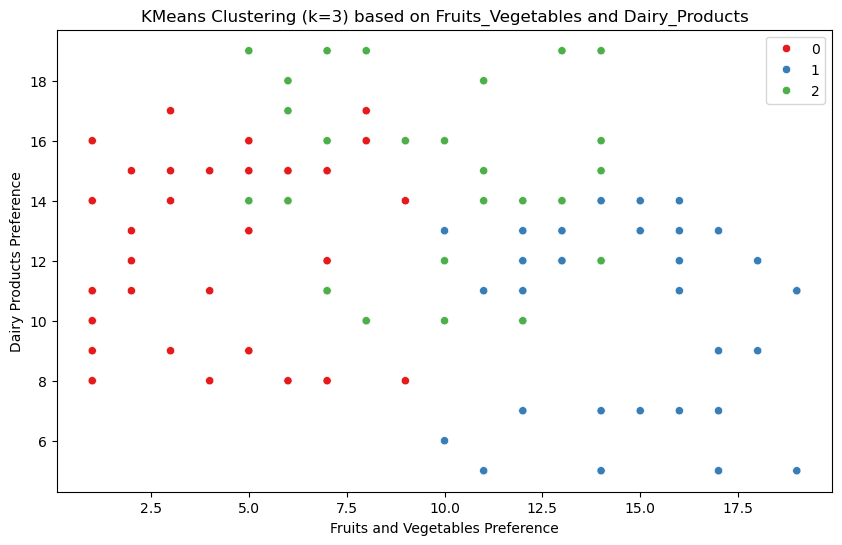

In [76]:
# TODO: Visualization code (scatter plot using two selected attributes and cluster labels)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_clustering, x='Fruits_Vegetables', y='Dairy_Products', hue=clusters['clusters_k3'], palette='Set1')
plt.title('KMeans Clustering (k=3) based on Fruits_Vegetables and Dairy_Products')
plt.xlabel('Fruits and Vegetables Preference')
plt.ylabel('Dairy Products Preference')
plt.show()

## 5. Choosing the optimal number of clusters — Elbow method

To choose the best number of clusters (K) objectively, use the Elbow method. This method inspects model inertia for different numbers of clusters.

**Inertia:** The sum of squared distances between points and their cluster center. Lower inertia indicates tighter clusters.

**Elbow method:** Look for a point in the plot where inertia decrease significantly slows down (the "elbow"). That point often suggests a suitable K.

**Task:**
1. Compute inertia for KMeans models with `K` from 1 to 10 (or up to 15, if preferred).
2. Plot the Elbow plot with K on the x-axis and inertia on the y-axis.
3. Based on the plot, identify the optimal number of clusters and explain your choice.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

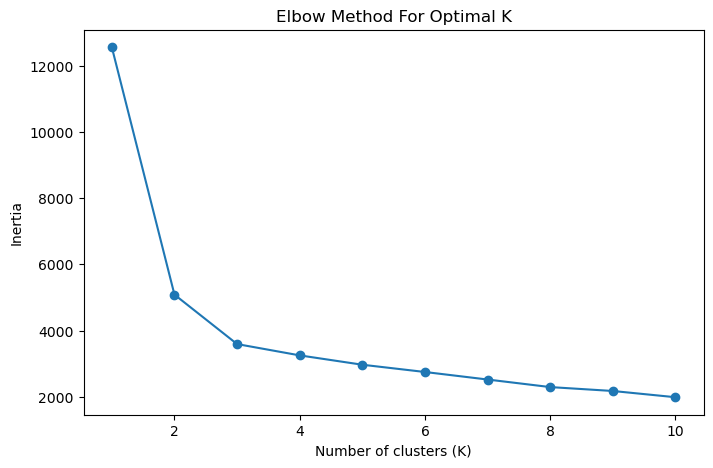

In [78]:
# TODO: Compute inertia for different K and plot the Elbow curve
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=300)
    kmeans_model.fit(X_clustering)
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


## 6. Conclusion and discussion (final interpretation)

**Task:**
1. Based on the optimal number of clusters you selected using the Elbow method (or your analysis), repeat step 3 (cluster sizes and centroids) for that chosen K.
2. Describe in detail the characteristics of each identified group of respondents. What are their food preferences? Are the groups logical? Which food categories contribute most to differences between groups?
3. Summarize what you learned from this exercise about clustering and data analysis.

In [82]:
# TODO: Repeat analysis for the chosen optimal number of clusters (cluster sizes, centroids)
k=2  # Example optimal K based on Elbow method
kmeans_model = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=300)
print(f"\nSize of cluster for k={k}: \n", pd.Series(kmeans_model.fit_predict(X_clustering)).value_counts().sort_index())

df_centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=X_clustering.columns)
print(f"\nCentroids for k={k}: \n", df_centroids)

for i in df_centroids.index:
    if df_centroids.loc[i].idxmax() == "Fruits_Vegetables":
        print(f"\nCluster {i} represents fruit and vegetables lovers.")
    elif df_centroids.loc[i].idxmax() == "Meat_Fish":
        print(f"\nCluster {i} represents meat and fish lovers.")
    elif df_centroids.loc[i].idxmax() == "Sweets_Snacks":
        print(f"\nCluster {i} represents sweets and snacks lovers.")
    elif df_centroids.loc[i].idxmax() == "Dairy_Products":
        print(f"\nCluster {i} represents dairy lovers.")
    elif df_centroids.loc[i].idxmax() == "Grains_Pastries":
        print(f"\nCluster {i} represents grains and pastries lovers.")
# TODO: Write your conclusion and discussion here in a Markdown cell after this code, or as comments in the code.
# Conclusion and Discussion:

# Based on the centroids, Cluster 0 has a high preference for Meat_Fish, indicating that this group prefers protein-rich foods.
# Cluster 1 shows a high preference for Grains_Pastries, suggesting that this group favors carbohydrates.
# The groups appear logical as they represent distinct dietary preferences.
# The food categories contributing most to differences between groups are Meat_Fish and Fruits_Vegetables.

# Clustering helps identify natural groupings in data based on feature similarities.
# It is essential to preprocess data correctly, such as removing irrelevant columns (like IDs).
# The Elbow method is a useful technique to determine the optimal number of clusters by analyzing inertia.
# Visualizations aid in interpreting clustering results and understanding group characteristics.



Size of cluster for k=2: 
 0    44
1    56
Name: count, dtype: int64

Centroids for k=2: 
    Fruits_Vegetables  Meat_Fish  Dairy_Products  Grains_Pastries  \
0           4.750000  15.295455       12.522727         4.704545   
1          13.089286   6.553571       12.000000        13.750000   

   Sweets_Snacks  
0      14.045455  
1       5.375000  

Cluster 0 represents meat and fish lovers.

Cluster 1 represents grains and pastries lovers.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
